# 신경망

- 신경망을 통해 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 이제부터 살펴볼 신경망의 중요한 성질이다. 
- 신경망의 개요를 알아보고, 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 자세히 알아보자.

> 퍼셉트론에서 신경망으로

- 입력층, 은닉층, 출력층으로 구성된다. 
- 이 중 은닉층의 뉴런은 사람 눈에는 보이지 않는다. 
- 뉴런이 연결되는 방식은 앞 장의 퍼셉트론과 달라진 것이 없다. 
- 차이점에 대해 알아보자

> 활성화 함수

- 입력 신호의 총합을 출력 신호로 변환하는 함수를 일컫는다.
- 활성화라는 이름이 말해주듯 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.
- 임계값을 경계로 출력이 바뀌는데 이런 함수를 계단 함수라고 한다. 
- 그래서 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다라고 할 수 있다.
- 즉 활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 채용하고 있다. 
- 그렇다면 계단 함수 이외의 함수를 사용하면 어떻게 될까. 사실 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠이다. 
- 신경망에서 이용하는 활성화 함수를 알아보자

- 신경망에서 자주 이용하는 활성화 함수인 시그모이드 함수를 알아보자
  - $\frac{1}{1+exp(-x)}$

- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다. 
- 앞 장에서본 퍼셉트론과 앞으로 볼 신경망의 주된 차이는 이 활성화 함수이다. 
- 계단 함수를 구현해보자

In [5]:
import numpy as np

def step_function(x):
    if x>0:
        return 1
    else : 
        return 0 

- 인수 x는 실수만 받아들인다. 즉 step_function(3.0) 같은 것은 가능하지만 step_function(np.array([1,2]))는 안 된다. 
- 가능하도록 해보자

In [6]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

- 아래 셀을 통해 위 함수를 이해해보자

In [7]:
x = np.array([-1,1,2])
y = x>0
y

array([False,  True,  True])

- 이렇게 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 새로 생성되고 y라는 변수에 저장된다.
- 그런데 우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수이기 때문에 아래 셀을 통해 변환하여 반환해주자

In [14]:
import warnings
warnings.filterwarnings("ignore") 


y = y.astype(np.int)
y

array([0, 1, 1])

- 이제 앞에서 정의한 계단 함수를 그래프로 그려보자

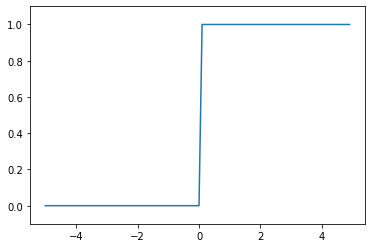

In [87]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0 , dtype=np.int)

x = np.arange(-5,5,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

- 시그모이드 함수를 구현해보자

In [22]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- 시그모이드 함수를 그래프로 그려보자

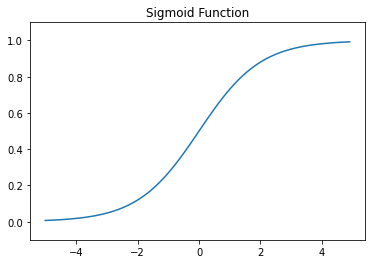

In [25]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.title('Sigmoid Function')
plt.show()

- 잡담 : 시그모이드란 'S'자 모양이라는 뜻이다. 계단 함수처럼 그 모양을 따 이름을 지은 것이다. 'S자 모양 함수'라고도 부를 수 있다.

----

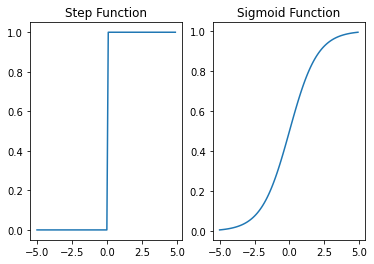

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2)
x = np.arange(-5,5,0.1)
y = step_function(x)
ax1.plot(x,y)
ax1.set_title('Step Function')
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
ax2.plot(x,y)
ax2.set_title('Sigmoid Function')
plt.show()

- 비교
  - 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변한다. 한편 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버린다. 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 한다. 
  - 다시 말해 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.
  - 공통점 : 둘 다 입력이 작을 때의 출력은 0에 가깝고 혹은 0이고 입력이 커지면 출력이 1에 가까워지는 혹은 1이 되는 구조이다. 
  - 즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.
  - 그리고 입력이 아무리 작거나 커도 출력은 0에서 1 사이라는 것도 둘의 공통점이다.
  - 또한 둘다 비선형 함수이다. 

- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 

----

- 시그모이드 함수는 신경망 분야에서 오래전부터 이용해왔으나 최근에는 ReUL(Rectified Linear Unit) 렐루 함수를 주로 이용한다. 
- 렐루 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고 0 이하이면 0을 출력하는 함수이다. 

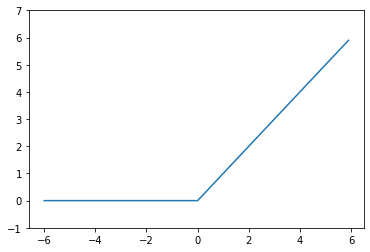

In [92]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-6 ,6 ,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1,7)
plt.show()

- ReLU 함수도 활성화 함수로 이용할 수 있다. 

---

- 넘파이의 다차원 배열에 대해 간략히 알아보자

In [93]:
b = np.array([[1,2],[3,4],[5,6]])
b

array([[1, 2],
       [3, 4],
       [5, 6]])

In [94]:
print(np.ndim(b))
print(np.shape(b))

2
(3, 2)


- $3 \times 2$ 배열이다.
- 처음 차원에는 원소가 3개 다음 차원에는 원소가 2개 들어있다는 의미이다.
- 이때 처음 차원은 0번째 차원, 다음 차원은 1번째 차원에 대응한다. 
  - 2차원 배열은 행렬이라고 부르고 가로방향을 행, 세로방향을 열이라고 부른다.

```python
np.dot()
```
은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다. 

주의할 것은 np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수 있다.(우연의 일치가 발생할 순 있다.)
- 행렬의 곱은 *과는 다르다

----

In [96]:
a = np.array([2,3]) # 입력 값
b = np.array([[1,2,3],[4,5,6]]) # 가중치
# 편향과 활성화 함수를 생략하고 가중치만 갖는 간단한 신경망이다.

np.dot(a,b)

array([14, 19, 24])

---

In [100]:
def identity_function(x):
    return x

def init_network():
    network = {}  # dict 형태로 이용할 것
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1) # 1층
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2) # 2층
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3) # 3층
    
    return y

network = init_network()
x = np.array([1,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [101]:
network

{'W1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 'b1': array([0.1, 0.2, 0.3]),
 'W2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]),
 'b2': array([0.1, 0.2]),
 'W3': array([[0.1, 0.3],
        [0.2, 0.4]]),
 'b3': array([0.1, 0.2])}